<a href="https://colab.research.google.com/github/acollin19/comp551_A1/blob/Angele/assignment1_group_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

## Process:
### Dataset 1: Hepatitis
* Task 1 : Preprocessing
    1. Preprocessing
    2. Distributions
* Task 2 : Implemenmting KNN and DT
    1. KNN
    2. DT
* Task 3 : Running Experiments
    1. Compare accuracy
    2. Different K values
    3. Max tree depth
    4. Different distance/costs
    5. Plots
    6. Key features in DT
    7. Key features in KNN

### Dataset 2: Messidor features
* Task 1 : Preprocessing
    1. Preprocessing
    2. Distributions
* Task 2 : Implemenmting KNN and DT
    1. KNN
    2. DT
* Task 3 : Running Experiments
    1. Compare accuracy
    2. Different K values
    3. Max tree depth
    4. Different distance/costs
    5. Plots
    6. Key features in DT
    7. Key features in KNN


In [82]:
import pandas as pd
import numpy as np
import math
from math import sqrt
from sklearn.model_selection import train_test_split
import scipy.spatial
from scipy.io import arff
from collections import Counter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(1)


In [63]:
# KNN Class
# Constructor class to initialize model parameters
class KNN:
    def __init__(self, k):
        self.k = k

    # Fit funcition takes input X and y
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    # Euclidean Distance function
    def distance(self, X1, X2):
        #distance = scipy.spatial.distance.euclidean(X1, X2)
        distance = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))

    
    # Predict function takes input X and outputs y
    def predict(self, X_test):
        output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(y_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            output.append(ans)
            
        return output
    
    # Evaluating prediction accuracy on true and target labels
    def evaluate_acc(self, X_test, y_test, y_train,X_train ):
        y_train_pred = self.predict(X_train)
        y_test_pred = self.predict(X_test)
        acc_test = np.sum(y_test_pred==y_test)/len(y_test)
        acc_train = np.sum(y_train_pred==y_train)/len(y_train)

        return (acc_test,acc_train)

In [83]:
#define the metric we will use to measure similarity
#if the input shapes are [1,N1,F] and [N2,1,F] then output shape is [N2,N1]
#as numpy supports broadcasting with arithmetic operations
#for more on numpy broadcasting refer to: https://numpy.org/doc/stable/user/basics.broadcasting.html   
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        # calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        # self.x is in shape (100, 2), x_test is in shape (50, 2)
        # self.x[None, :, :] is in shape (1, 100, 2), and x_test[:,None,:] is in shape (50, 1, 2)
        # result: (x_test.shape[0], self.x.shape[0])
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            # print(i)
            knns[i,:] = np.argsort(distances[i])[:self.K]
            # print(knns[i,:])
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns

In [84]:
# Loading/cleaning datasets
hepatitis = pd.read_csv("hepatitis.data", header=None)
hepatitis = hepatitis[(hepatitis != '?').all(axis=1)]
hepatitis = hepatitis.dropna().reset_index(drop=True)
hepatitis = hepatitis.apply(pd.to_numeric)
hepatitis

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
1,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.3,78,30,4.4,85,1
2,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.0,59,249,3.7,54,1
3,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.9,81,60,3.9,52,1
4,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2,45,1,2,1,2,2,2,2,2,2,2,2,2,1.3,85,44,4.2,85,2
76,1,49,1,1,2,1,1,2,2,2,1,1,2,2,1.4,85,70,3.5,35,2
77,2,31,1,1,2,1,2,2,2,2,2,2,2,2,1.2,75,173,4.2,54,2
78,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


### Hepatitis Attribute Information:

1. Class: DIE, LIVE 
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80 
3. SEX: male, female 
4. STEROID: no, yes 
5. ANTIVIRALS: no, yes 
6. FATIGUE: no, yes 
7. MALAISE: no, yes 
8. ANOREXIA: no, yes 
9. LIVER BIG: no, yes 
10. LIVER FIRM: no, yes 
11. SPLEEN PALPABLE: no, yes 
12. SPIDERS: no, yes 
13. ASCITES: no, yes 
14. VARICES: no, yes 
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00  
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250 
17. SGOT: 13, 100, 200, 300, 400, 500, 
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0 
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90 
20. HISTOLOGY: no, yes 



## Task 1.2 : Distributions

In [85]:
# Hepatitis Dataset
X = hepatitis.iloc[:, hepatitis.columns != 0].values # x -> features (1-19)
y = hepatitis.iloc[:, 0].values # y -> class label (0)

In [86]:
# Split Training and Testing without sklearn

# split = 0.8
# n_train = math.floor(split * X.shape[0])
# n_test = math.ceil(1-split * X.shape[0])
# X_train = X[:n_train]
# y_train = y[:n_train]
# X_test = X[n_train:]
# y_test = y[n_train:]

# Split Training and Testing with sklearn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, shuffle=True)
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])

Total Number of rows in train: 64
Total Number of rows in test: 16


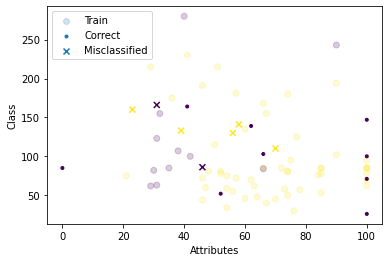

In [90]:
# Plotting
myK = 1
model = KNN(K=myK)
y_prob, knns = model.fit(X_train, y_train).predict(X_test)
y_pred = np.argmax(y_prob, axis=-1)
correct = y_test == y_pred
incorrect = np.logical_not(correct)

#visualization of the points
plt.scatter(X_train[:,17], X_train[:,14], c=y_train, marker='o', alpha=.2, label='Train')
plt.scatter(X_test[correct,17], X_test[correct,14], marker='.', c=y_pred[correct], label='Correct')
plt.scatter(X_test[incorrect,17], X_test[incorrect,14], marker='x', c=y_test[incorrect], label='Misclassified')

plt.xlabel("Attributes")
plt.ylabel("Class")
plt.legend(loc='best')
plt.savefig("hepatitis_dist.png", bbox_inches='tight', dpi=300)

## Task 2 : K-Nearest Neighbour

Finding KNN models without using pre-existing libraries.

In [91]:
classifier = KNN(5)
classifier.fit(X_train, y_train)

# Evaluating prediction accuracy on training data
test,train = classifier.evaluate_acc(X_test,y_test,y_train, X_train)

print(f'Training Accuracy: {train}')
print(f'Testing Accuracy: {test}')


AttributeError: ignored

## Task 2.2 : Decision Trees

# Dataset 2 : Messidor Features

## Task 1.1 Preprocessing

In [62]:
# features = pd.read_csv('messidor_features.csv')
data = arff.loadarff('messidor_features.arff')
features = pd.DataFrame(data[0])
features = features[(features != '?').all(axis=1)]
features = features.dropna().reset_index(drop=True)
features = features.apply(pd.to_numeric)
features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,1
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,1


### Features Attribute Information:

0. The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.
1. The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.  
* (2-7). The results of MA detection. Each feature value stand for the number of MAs found at the confidence levels alpha = 0.5,...,1, respectively.     
* (8-15). contain the same information as 2-7) for exudates. However, as exudates are represented by a set of points rather than the number of pixels constructing the lesions, these features are normalized by dividing the number of lesions with the diameter of the ROI to compensate different image sizes.   
16. The euclidean distance of the center of the macula and the center of the optic disc to provide important information regarding the patientâ€™s condition. This feature is also normalized with the diameter of the ROI.   
17. The diameter of the optic disc.   
18. The binary result of the AM/FM-based classification.   
19. Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR. 

## Task 1.2 Distributions

In [ ]:
# Messidor features dataset
X = features.iloc[:,:-1].values # x -> features (0-18)
y = features.iloc[:,-1:].values # y -> class label (19)

# Split Training and Testing without sklearn
split = 0.8
n_train = math.floor(split * X.shape[0])
n_test = math.ceil(1-split * X.shape[0])
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])

Total Number of rows in train: 920
Total Number of rows in test: 231


In [ ]:
# Messidor Features Plotting


## Task 2 : K-Nearest Neighbour

In [ ]:
classifier = KNN(5)
classifier.fit(X_train, y_train)

# Evaluating prediction accuracy on training data
test,train = classifier.evaluate_acc(X_test,y_test,y_train, X_train)

print(f'Training Accuracy: {train}')
print(f'Testing Accuracy: {test}')


TypeError: ignored

## Task 2.2 : Decision Trees